# Draft

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from statistics import mean
from statistics import stdev

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
random_seed = 108108108
px = 1/plt.rcParams['figure.dpi']

In [3]:
%config InlineBackend.figure_formats = ['svg']

In [4]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
                # 'font.sans-serif': [
                #     'Helvetica',
                #     'Verdana',
                #     'Tahoma',
                #     'Trebuchet MS',
                #     'Arial',
                #     'Chevin'
                #     ]
                }

# rcParams.update(custom_params)

## Play With `pandas.DataFrame.sample`

In [5]:
series = pd.Series(
    np.random.randint(
        low=17,
        high=512,
        size=303,
        dtype=int
    )
)

In [6]:
display(
    len(series.index),
    series.head()
)

303

0    239
1     63
2    482
3    313
4    495
dtype: int64

In [7]:
series.sample(
    frac=1,
    random_state=random_seed
)

54     478
263    267
49     438
204    385
60     471
      ... 
175    153
270     40
131    326
45     324
123     44
Length: 303, dtype: int64

In [8]:
sample_size = int(len(series)/3)

# series[:sample_size].index

for i in range(0, len(series), sample_size):
    #valid_indexes = target[i:i+sample_size].index
    #train_indexes = target.index.difference(valid_indexes)
    
    print(i)
    valid_indexes = range(i, i+sample_size-1)
    train_indexes = list(range(0, i)) + list(range(i+sample_size, len(series)))
    print(valid_indexes)
    print(train_indexes)
        

0
range(0, 100)
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297

In [9]:
for i in range(0, len(series), sample_size):
    print(i)
    valid_indexes = range(i, i+sample_size-1)
    train_indexes = range(0, i)
    print(valid_indexes)
    print(train_indexes)

0
range(0, 100)
range(0, 0)
101
range(101, 201)
range(0, 101)
202
range(202, 302)
range(0, 202)


In [10]:
display(
    series[train_indexes]
)

0      239
1       63
2      482
3      313
4      495
      ... 
197    248
198    463
199    182
200    473
201    198
Length: 202, dtype: int64

## Случайное распределение после `sklearn.preprocessing.StandardScaler`

In [11]:
series_train = series.sample(
    frac=.75,
    replace=False,
    random_state=random_seed,
    ignore_index=True,
)

In [12]:
display(
    series_train.head(3)
)

0    478
1    267
2    438
dtype: int64

In [13]:
stdev_train = stdev(series_train)
mean_train = mean(series_train)

In [14]:
# scaler = StandardScaler()
# scaler.fit(
#     np.reshape(a=series_train, newshape=(-1, 1))
# )

series_stndrd = series.apply(lambda s: (s -  mean_train) / stdev_train)

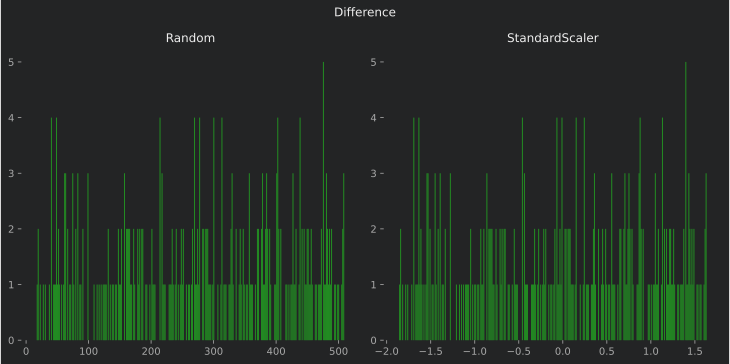

In [15]:
with mpl.rc_context(custom_params):
    fig, axs = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(1024*px, 512*px),
        tight_layout=True
    )

    n_bins = len(series.index)

    axs[0].hist(series, bins=n_bins, color='forestgreen')
    axs[0].set_title('Random')
    axs[1].hist(series_stndrd, bins=n_bins, color='forestgreen')
    axs[1].set_title('StandardScaler')

    fig.suptitle('Difference')

    plt.show()

<hr>

09_project

<p style=color:goldenrod;><strong>NB!</strong> Посмотреть и исправить ошибки вычисления python, поменять точность...</p>

~~На всякий случай глянем в `gold_recovery_full`~~

~~Посмотрим какие колонки содержат `NaN`:~~

~~Если вопрос о типе данных, то `float64`  
Если вопрос о `[тип_параметра]`, то:~~
  
~~- **input** — параметры сырья;~~
~~- **state** — параметры, характеризующие текущее состояние этапа;~~

Пример борьбы с мультиколлинеарностью подсмотрел на хабре:  
[Устраняем мультиколлинеарность признаков в ML при помощи графов](https://habr.com/ru/company/akbarsdigital/blog/592493/)  
© DS_voyager

In [ ]:
def get_scores(features, target, rnd_state=random_seed):
    """Returns features scores.

    Parameters
    ----------
    features: pd.DataFrame. Dataset with all features.
    target: array. Ground truth of target.
    rnd_state: integer. Random state.

    Returns
    -------
    scores: dictionary. Features and their scores.
    """

    scores = dict()

    for feature in features.columns:
        mask = ~features[feature].isna()
        X = features[mask][[feature]]
        y = target[mask]
        # discr_fts_mask = X.dtypes.values == 'int64'
        #  в оригинале mutual_info_classif
        score = mutual_info_regression(
            X=X,
            y=y,
            discrete_features='auto',
            # в оригинале discr_fts_mask
            n_neighbors=5,
            random_state=rnd_state
        )
        scores[feature] = score[0]

    return scores


#  © DS_voyager

In [ ]:
def get_noncollinear_fts(features, target, trsh=0.75, mode="all", rnd_state=random_seed, verbose=True):
    """Returns maximum linearly independent subset of features by threshold.

    Parameters
    ----------
    features: pd.DataFrame. Dataset with all features.
    target: array. Ground truth of target.
    trsh: float. threshold of correlation.  
    mode: string. 'all' returns all sets 'max' returns max set
    random_seed: integer. Random state.
    verbose: bool. Print steps or not

    Returns
    -------
    answer: dictionary. key - length of set, value - features and total score
    G: graph
    """

    # 1. MI calculation
    scores = get_scores(features, target, rnd_state)

    # 2. Correlation matrix calculation
    corr_matrix = features.corr().abs()
    fts = corr_matrix.columns
    corr_matrix = np.array(corr_matrix)

    # 3. Graph assembling
    # Fill diagonal elements by 2. That value is greater than trashold
    np.fill_diagonal(corr_matrix, 2)
    corr_matrix = pd.DataFrame(corr_matrix, columns=fts, index=fts)
    graph_matrix = corr_matrix[abs(corr_matrix) > trsh]
    # High-correlated vertices does not connect by edge
    graph_matrix[~graph_matrix.isna()] = 0
    # Other vertices connect by edges
    graph_matrix.fillna(1, inplace=True)
    G = nx.from_numpy_matrix(np.array(graph_matrix))
    G = nx.relabel_nodes(G, dict(zip(list(G.nodes), fts)))

    # 4. Qliques search
    clq = nx.find_cliques(G)
    cliques = list(clq)
    lens = np.array(list(map(len, cliques)))  # size of cliques
    stat = pd.Series(lens).value_counts()  # qliques distribution by size
    if verbose:
        print(stat)

    # 5. Optimal qlique search
    answer = {}
    if mode == "all":
        iter_list = sorted(np.array(stat.index))
    elif mode == "max":
        iter_list = [np.array(stat.index).max()]
    for val in iter_list:
        if verbose:
            print(f"Search best clique for dim = {val}")
        max_curr = -1e5
        fts_list = []
        for idx in np.argwhere(lens == val).ravel():
            summa = 0
            for col in cliques[idx]:
                summa += scores[col]
            if summa > max_curr:
                max_curr = summa
                fts_list = cliques[idx]
        answer[val] = (fts_list, max_curr)

    return answer, G


#  © DS_voyager

>  Клика — это такой подграф, в котором все вершины попарно соединены друг с другом.

In [ ]:
# Поиск максимальных клик
qlq_list, G = get_noncollinear_fts(
    features_rougher_train,
    terget_rougher_train,
    trsh=0.85,
    mode="all",
    verbose=True
)
# 0.85

In [ ]:
# Найденные оптимальные клики и суммарное значение MI
display(
    qlq_list
)

~~Ну вот, золота нет среди признаков..~~